# Data preprocessing

prépare les données avant le passage dans la machine => nettoyer,filtrer,normaliser<br>
étapes de preprocessing:
- encodage => convertire les valeurs qualitatives en valeur numérique
- normalisation => mettre toutes les valeurs sur une même échelle
- imputation => remplace des valeurs manquantes par des valeurs statistiques
- sélection => sélectionne les variables les plus utiles au dev d'un modèle
- extraction de variable => génère de nouvelle variable à partir d'info caché dans le dataset

## encodage des valeurs qualitatives

se divisent en deux catégories :

### ordinal

associe à chaque classe ou catégorie une valeur décimale unique

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #ne permet de traiter qu'une seule colonne

In [2]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

In [6]:
encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [9]:
encoder.inverse_transform(np.array([0, 0, 2, 2]))

array(['chat', 'chat', 'oiseau', 'oiseau'], dtype='<U6')

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
X = np.array([['chat', 'poils'],['chien', 'poils'], ['chat', 'poils'], ['oiseau', 'plumes']])

In [26]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

pose problème pour les machines learnings car pas de sens de hiérarchiser des valeurs sauf pour ceux basé sur des arbres de descisions (pas affecté) <br>
résolu par l'encodage onehot

### one hot

les catégories ou classe sont encodés de manière binaire dans une colonne qui lui est propre

In [17]:
from sklearn.preprocessing import LabelBinarizer

In [23]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])
encoder = LabelBinarizer(sparse_output=True) #sparse_output créé un tableau compressé
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
X = np.array([['chat', 'poils'],['chien', 'poils'], ['chat', 'poils'], ['oiseau', 'plumes']])

In [29]:
encoder = OneHotEncoder() #créé par défaut un tableau compressé
encoder.fit_transform(X)

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

attention => ne peut pas prendre en compte de nouvelles catégories/classes si rencontré dans le train_set

## normalisation des valeurs valeurs quantitatives

### transformation MinMax

transforme chaque valeur pour qu'elle soit comprise entre 0 et 1

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
X = np.array([[70], [80], [120]])

In [33]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [36]:
X_test = np.array([[90]])
scaler.transform(X_test)

array([[0.4]])

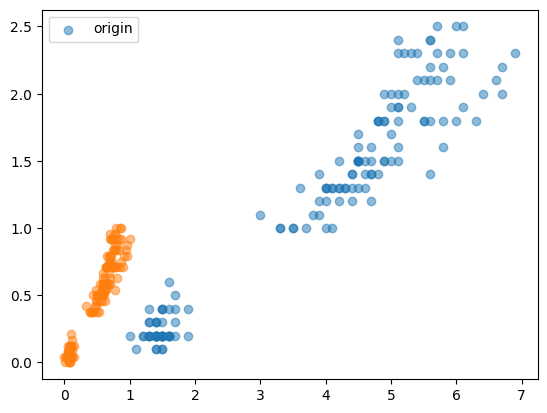

In [47]:
from sklearn.datasets import load_iris
iris = load_iris()

X= iris.data

X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha = 0.5, label='origin')
plt.scatter(X_minmax[:,2], X_minmax[:,3], alpha=0.5)
plt.legend()

## standardScaler

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
X = np.array([[70], [80], [120]])

In [46]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

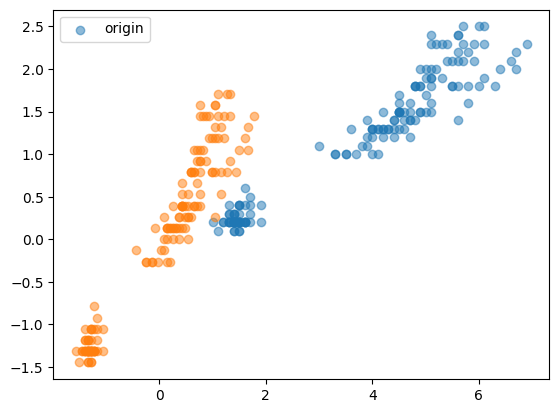

In [49]:
from sklearn.datasets import load_iris
iris = load_iris()

X= iris.data

X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha = 0.5, label='origin')
plt.scatter(X_stdscl[:,2], X_stdscl[:,3], alpha=0.5)
plt.legend()

attention => les deux techniques sont sensibles aux valeurs aberrantes

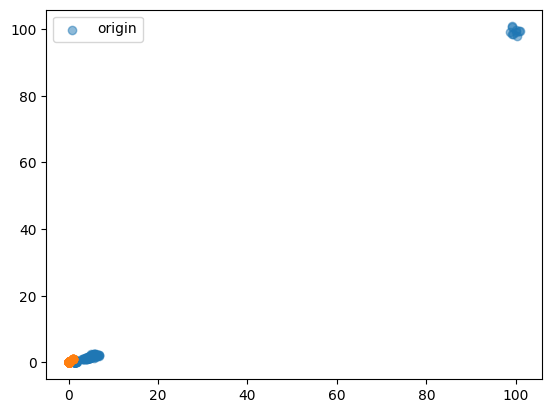

In [50]:
from sklearn.datasets import load_iris
iris = load_iris()

X= iris.data

outliers = np.full((10, 4), 100) + np.random.randn(10, 4)
X = np.vstack((X, outliers))

X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha = 0.5, label='origin')
plt.scatter(X_minmax[:,2], X_minmax[:,3], alpha=0.5)
plt.legend()

### robustScaler

peu sensible aux valeurs aberrantes

In [52]:
from sklearn.preprocessing import RobustScaler

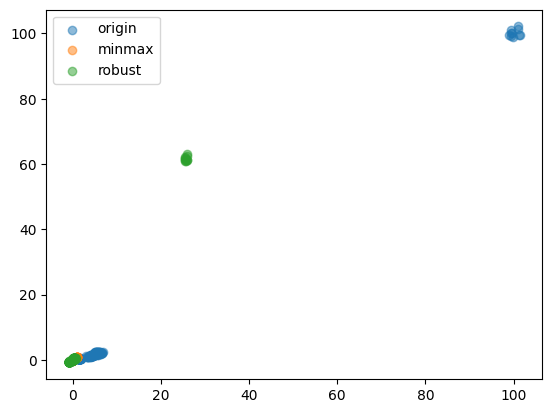

In [55]:
from sklearn.datasets import load_iris
iris = load_iris()

X= iris.data

outliers = np.full((10, 4), 100) + np.random.randn(10, 4)
X = np.vstack((X, outliers))

X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha = 0.5, label='origin')
plt.scatter(X_minmax[:,2], X_minmax[:,3], alpha=0.5, label='minmax')
plt.scatter(X_robust[:,2], X_robust[:,3], alpha=0.5, label='robust')
plt.legend()

## autres transformers présent dans le module preprocessing

### polynomialFeatures

créer des variables polymoniales à partir des valeurs existantes => feature engineering => permet de créer des modèles plus riches et plus sûrs

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
X = np.array([[1], [2], [0.5]])

In [58]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

exemple avant/après

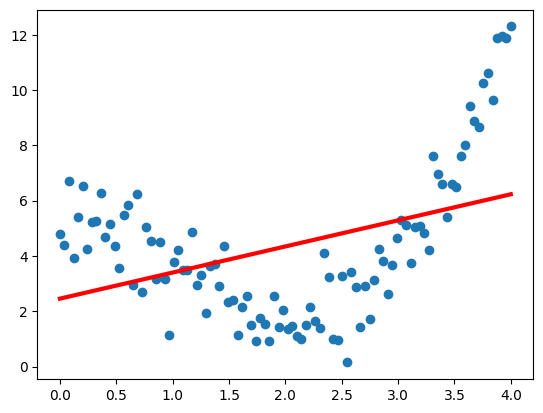

In [59]:
from sklearn.linear_model import LinearRegression

X = np.linspace(0, 4, 100).reshape((100, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(100, 1)

plt.scatter(X, y)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.plot(X, y_pred, c='r', lw=3)

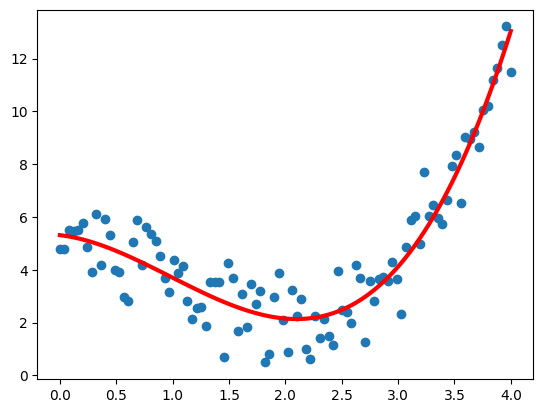

In [60]:
from sklearn.linear_model import LinearRegression

X = np.linspace(0, 4, 100).reshape((100, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(100, 1)

plt.scatter(X, y)

X_poly = PolynomialFeatures(3).fit_transform(X)

model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.plot(X, y_pred, c='r', lw=3)

attention => ne pas oublier de normaliser les données après avoir utilisé polynomialFeatures

# Pipeline

associe un transformator(normalisation) et un estimator(entrainement) => composite estimator

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [71]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

array([0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1,
       2, 0, 0, 2, 0, 0, 2, 2])

In [72]:
model = make_pipeline(StandardScaler(), SGDClassifier())

In [73]:
model.fit(X_train, y_train)
model.predict(X_test)

array([0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1,
       2, 0, 0, 2, 0, 0, 2, 2])

In [74]:
from sklearn.model_selection import GridSearchCV

In [76]:
model = make_pipeline(PolynomialFeatures(), StandardScaler(), SGDClassifier(random_state=0))
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [80]:
params = {
   'polynomialfeatures__degree': [2, 3, 4],
   'sgdclassifier__penalty': ['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [81]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'}

In [82]:
grid.score(X_test, y_test)

0.9333333333333333